In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import os

Gets unique columns and total number of columns.

In [2]:
def get_info(levels):
    unique_columns = set()
    column_count = 0
    
    for level_matrix in levels:
        count = len(level_matrix[0])
        column_count += count

        columns = [[] for i in range(count)]

        for row in level_matrix:
            for i in range(len(row)):
                columns[i].append(row[i])

        for c in columns:
            unique_columns.add(','.join(c))

    print(f'Unique Columns: {len(unique_columns)}')
    print(f'Columns: {column_count}')
    print(f'Unique_Columns/Column_Count = {len(unique_columns) / column_count}')
    
    return len(unique_columns), column_count

Builds level matrix by column for each file found in path that isn't a metadata file.

In [3]:
def get_file_contents(path):
    levels = []
    for file_name in os.listdir(path):
        if 'meta' in file_name:
            continue

        file_path = os.path.join(path, file_name)
        if os.path.isdir(file_path):
            continue

        f = open(file_path)
        content = f.read()
        f.close()

        levels.append(json.loads(content))

    return levels

### Custom Levels

In [4]:
created = get_file_contents(os.path.join('..', 'Assets', 'Resources', 'Levels'))
custom_unique, custom_total = get_info(created)

Unique Columns: 231
Columns: 868
Unique_Columns/Column_Count = 0.2661290322580645


### VGLC

In [5]:
mar = get_file_contents(os.path.join('..', 'Assets', 'Resources', 'Levels', 'SuperMarioBros'))
vglc_unique, vglc_total = get_info(mar)

Unique Columns: 210
Columns: 2938
Unique_Columns/Column_Count = 0.07147719537100068


### Custom and VGLC

In [6]:
levels = created.copy()
levels.extend(mar)
both_unique, both_total = get_info(levels)

Unique Columns: 441
Columns: 3806
Unique_Columns/Column_Count = 0.11586967945349448


This also shows that there are no common columns between the VGLC mario levels and the custom-made levels (2938 + 868 = 3806).

### Histogram for Column Counts vs. Unique

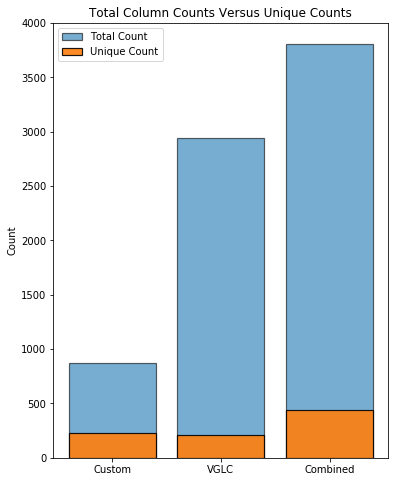

In [7]:
labels = ["Custom", "VGLC", "Combined"]

total = [custom_total, vglc_total, both_total]
unique = [custom_unique, vglc_unique, both_unique]

plt.figure(figsize=(6, 8))
plt.ylabel("Count")
plt.title("Total Column Counts Versus Unique Counts")

plt.bar(labels, total, alpha=0.6, edgecolor='black', linewidth=1.2, label='Total Count')
plt.bar(labels, unique, alpha=0.9, edgecolor='black', linewidth=1.2, label='Unique Count')

plt.yticks(np.arange(0, both_total + 200, 500))
plt.legend()